# Data Preparation Phase

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
#Read dataset
whitewine_data = pd.read_csv('winequality-white.csv',sep=';')
whitewine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Renaming columns
whitewine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',\
                            'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':\
                             'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [4]:
whitewine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Checking nulls
whitewine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Summary
whitewine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


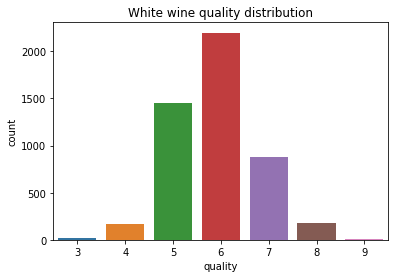

In [7]:
#Look at distribution for wine quality
ax = sns.countplot(x=whitewine_data["quality"], data=whitewine_data)
plt.title("White wine quality distribution")
plt.savefig("Images/WhiteWines/quality_distribution.png")

* Above graph tells us that most of the white wines have quality of 5,6 or 7.

# Feature selection

## 1. Pearson correlation - Filter Method

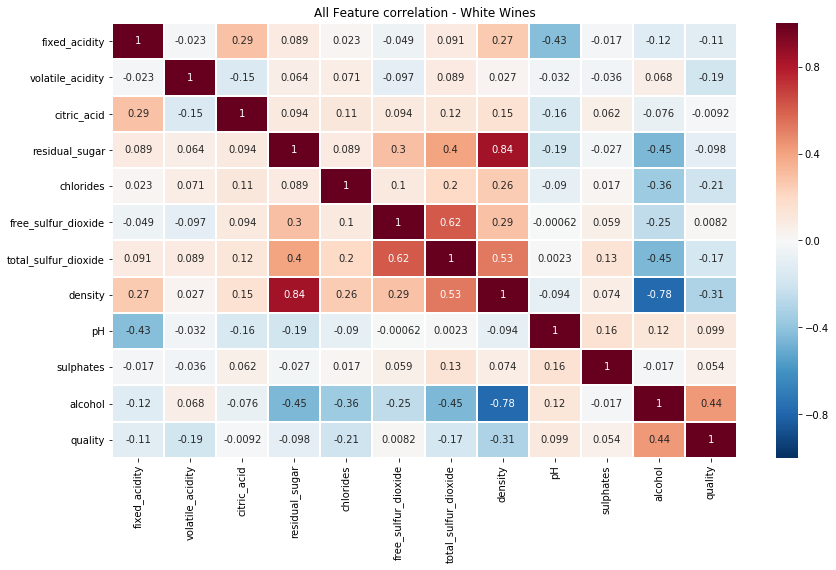

In [8]:
#Visualize correlation of all features using seaborn heatmap
corr = whitewine_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.title("All Feature correlation - White Wines")
plt.savefig("Images/WhiteWines/white_wine_all_feature_corr.png")
plt.show()

In [9]:
# Find correlation of important features with wine quality
corr_target = abs(corr["quality"])

#Here we will consider all features that have over 10% impact on quality
relevant_features = corr_target[corr_target>0.1]
relevant_features.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile_acidity        0.194723
total_sulfur_dioxide    0.174737
fixed_acidity           0.113663
Name: quality, dtype: float64

### Find correlation among selected features

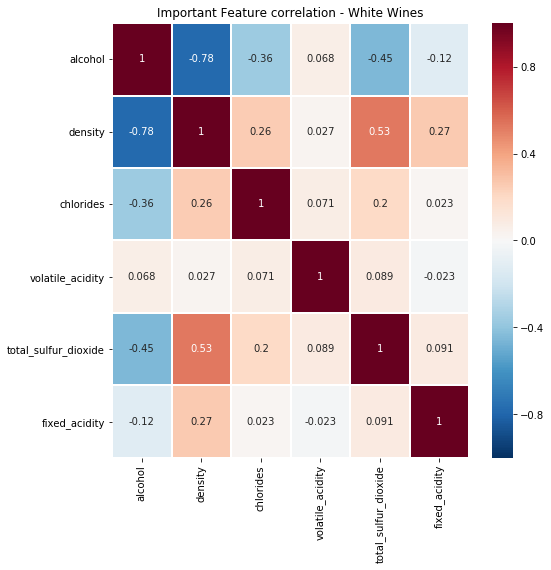

In [10]:
feat_corr = whitewine_data[["alcohol","density","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(feat_corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.title("Important Feature correlation - White Wines")
plt.savefig("Images/WhiteWines/white_wine_imp_feature_corr.png")
plt.show()

### From above heatmap, we can tell that -
* density and alcohol are highly negatively correlated.
* So we will eliminate density since it has lesser impact on quality. 

In [11]:
#Alternatively we can find correlation this way
print(whitewine_data[["alcohol","density","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity"]].corr())

                       alcohol   density  chlorides  volatile_acidity  \
alcohol               1.000000 -0.780138  -0.360189          0.067718   
density              -0.780138  1.000000   0.257211          0.027114   
chlorides            -0.360189  0.257211   1.000000          0.070512   
volatile_acidity      0.067718  0.027114   0.070512          1.000000   
total_sulfur_dioxide -0.448892  0.529881   0.198910          0.089261   
fixed_acidity        -0.120881  0.265331   0.023086         -0.022697   

                      total_sulfur_dioxide  fixed_acidity  
alcohol                          -0.448892      -0.120881  
density                           0.529881       0.265331  
chlorides                         0.198910       0.023086  
volatile_acidity                  0.089261      -0.022697  
total_sulfur_dioxide              1.000000       0.091070  
fixed_acidity                     0.091070       1.000000  


### Our final list of important features

In [12]:
imp_features = whitewine_data.loc[:,["alcohol","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity"]]
imp_features.head()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,fixed_acidity
0,8.8,0.045,0.27,170.0,7.0
1,9.5,0.049,0.30,132.0,6.3
2,10.1,0.050,0.28,97.0,8.1
3,9.9,0.058,0.23,186.0,7.2
4,9.9,0.058,0.23,186.0,7.2


## 2. Feature selection using Lasso Regularization
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [13]:
X = whitewine_data.drop('quality',1)   #Feature Matrix
y = whitewine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(4898, 11) (4898, 1)


In [14]:
#Lasso
reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.006575
Best score using built-in LassoCV: 0.262125


In [15]:
coef

fixed_acidity          -0.051962
volatile_acidity       -1.303798
citric_acid             0.000000
residual_sugar          0.022013
chlorides              -0.000000
free_sulfur_dioxide     0.005694
total_sulfur_dioxide   -0.001104
density                -0.000000
pH                      0.000000
sulphates               0.000000
alcohol                 0.355502
dtype: float64

In [16]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 5 variables


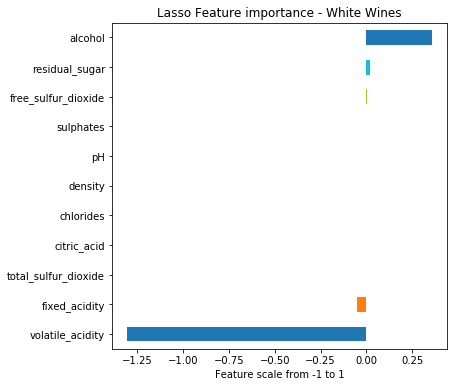

In [17]:
#Plot important features
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso Feature importance - White Wines")
plt.xlabel("Feature scale from -1 to 1")
plt.savefig("Images/WhiteWines/white_wine_Lasso_feature_sel.png")
plt.show()

### Features that Lasso selected are :
* fixed acidity
* Volatile acidity
* residual sugar
* free_sulfur_dioxide
* total_sulfur_dioxide
* alcohol

# Applying Linear Regression to our data

In [18]:
X = whitewine_data.drop('quality',1)   #Feature Matrix
y = whitewine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(4898, 11) (4898, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


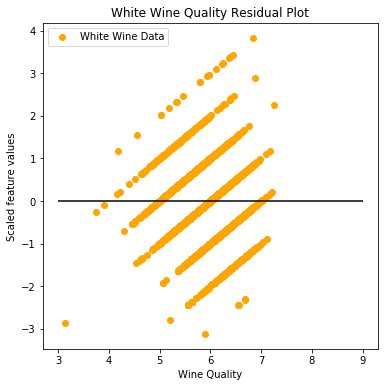

In [ ]:
# Residual plot 
plt.scatter(model.predict(X), model.predict(X) - y, c="orange", label="White Wine Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("White Wine Quality Residual Plot")
plt.xlabel("Wine Quality")
plt.ylabel("Scaled feature values")
plt.savefig("Images/WhiteWines/white_wine_residual_plot.png")
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
### Coclusion
Since there is a pattern in the data, linear regression is not a good fit for our dataset. So we will choose a non-linear model. 

# Detecting outliers in our dataset

### 1. Let's convert our output into a categorical value set  

In [ ]:
# #Defining the splits for wine quality. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
whitewine_data['quality_class'] = pd.cut(whitewine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
# display(whitewine_data.head(n=10))
whitewine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
whitewine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### 2. Let's visualize the selected features against our categorical output

C:\Users\18137\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\18137\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


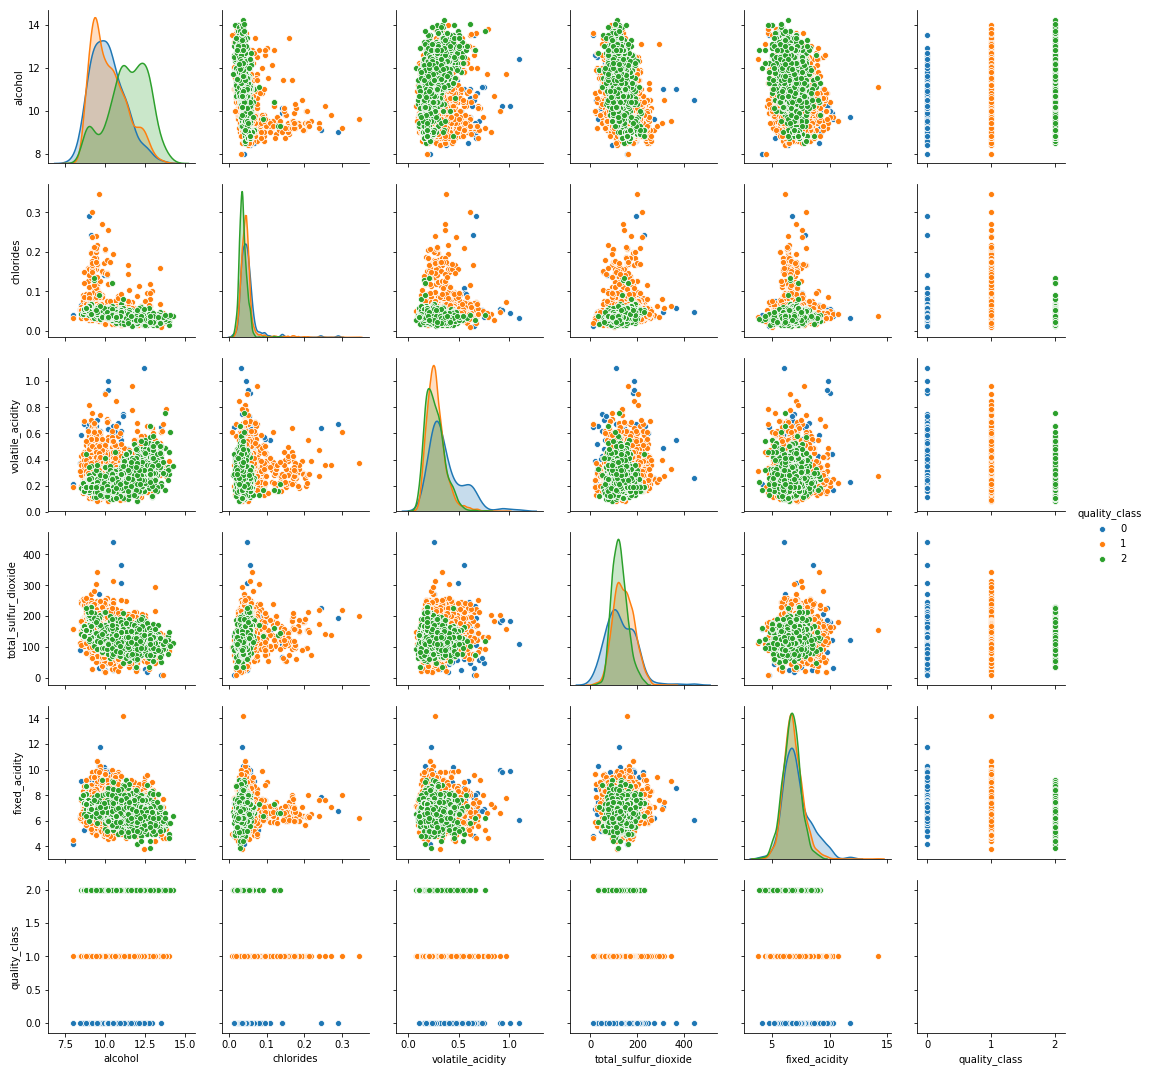

In [ ]:
# imp_features = whitewine_data.loc[:,["alcohol","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity"]]
# imp_features.head()
# # Plot
data = whitewine_data.loc[:,["alcohol","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity", "quality_class"]]
sns.pairplot(data, hue='quality_class')
;
plt.savefig("Images/WhiteWines/white_wine_feature_heatmap.png")

### 3. Let's identify outliers

#### Total sulfur dioxide

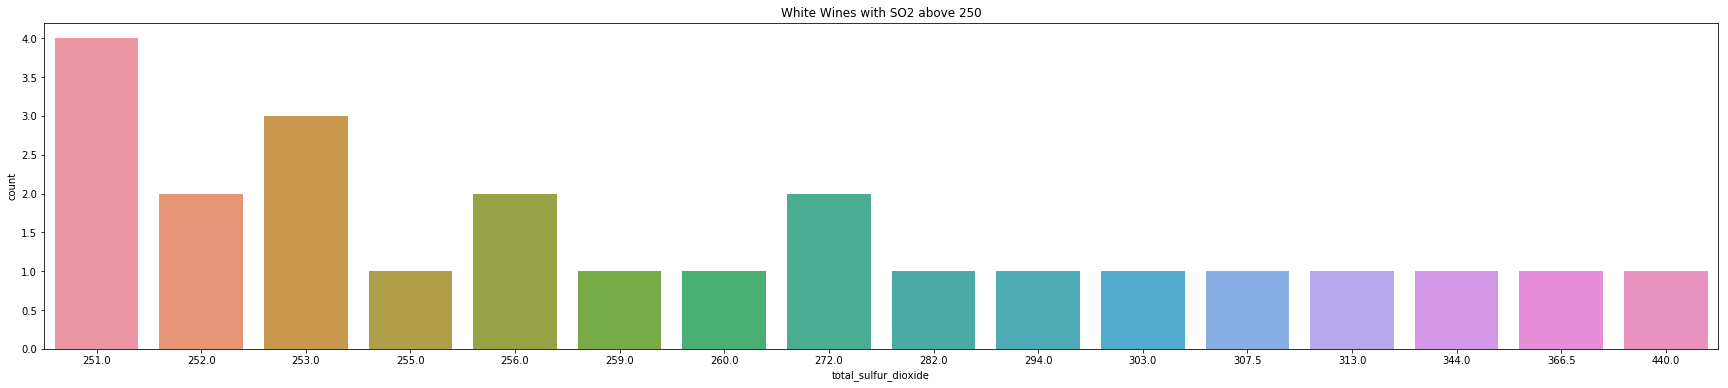

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x="total_sulfur_dioxide", data=whitewine_data[whitewine_data.total_sulfur_dioxide > 250])
plt.title("White Wines with SO2 above 250")
plt.savefig("Images/WhiteWines/white_wine_so2_above250.png")

In the EU the maximum levels of sulfur dioxide that a wine can contain are 210 ppm for white wine, 400 ppm for sweet wines — and 160 ppm for red wine. Quite similar levels apply in the U.S., Australia and around the world.
https://www.thekitchn.com/the-truth-about-sulfites-in-wine-myths-of-red-wine-headaches-100878
The amount of sulphur dioxide winemakers are allowed to add is strictly controlled to a limit of 250 milligrams per litre.
https://www.wineselectors.com.au/selector-magazine/wine/preserving-the-truth-on-sulphates-in-wine

It appears that this dataset is a combination of white and sweet wines

#### Fixed acidity can be in the range of 2-10. Typical range is 4-8 g/L. The more the acidity, the more sour is your wine. 

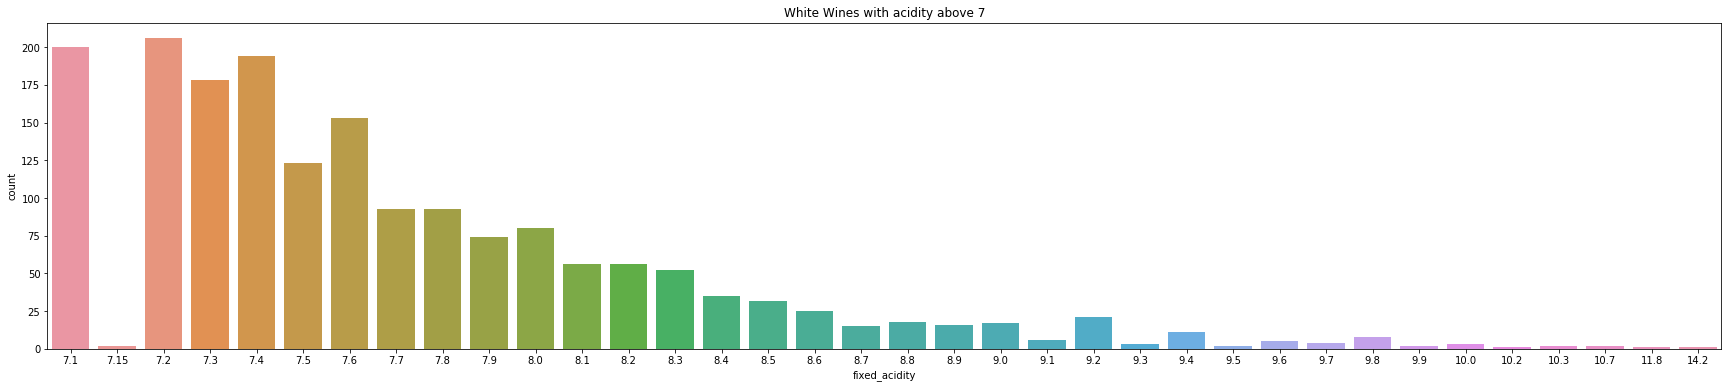

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x="fixed_acidity", data=whitewine_data[whitewine_data.fixed_acidity > 7])
plt.title("White Wines with acidity above 7")
plt.savefig("Images/WhiteWines/white_wine_acidity_above7.png")

### 4. Eliminate Outliers

We will eliminate wines with fixed_acidity above 10 and total SO2 above 400

In [ ]:
whitewine_df_trimmed = whitewine_data.drop(whitewine_data[(whitewine_data.fixed_acidity > 10 ) | \
                                                    (whitewine_data.total_sulfur_dioxide > 400)].index)
whitewine_df_trimmed.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000,4890.000000
mean,6.848763,0.278275,0.333906,6.393425,0.045779,35.270961,138.300307,0.994024,3.188507,0.489734,10.515211,5.880164
std,0.826980,0.100828,0.120718,5.073960,0.021864,16.619781,42.274388,0.002990,0.150811,0.114080,1.231216,0.882986
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,10.000000,1.100000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.080000,14.200000,9.000000


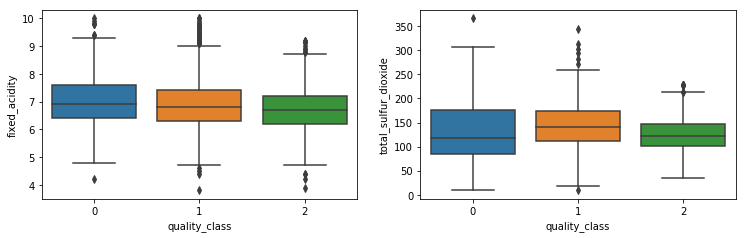

In [ ]:
#Visualize features after removing outliers using boxplot
plt.figure(figsize=(26,16))
no_outliers = whitewine_df_trimmed.loc[:,["fixed_acidity","total_sulfur_dioxide","quality_class"]]
for column_index, column in enumerate(no_outliers.columns):
    if column == 'quality_class':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='quality_class', y=column, data=no_outliers)
plt.savefig(f"Images/WhiteWines/white_wine_boxplot.png")

### 5. Here's our clean dataset

In [ ]:
whitewine_df_clean = whitewine_df_trimmed.loc[:,["alcohol","chlorides","volatile_acidity","total_sulfur_dioxide","fixed_acidity", "quality","quality_class"]]
whitewine_df_clean.head()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,fixed_acidity,quality,quality_class
0,8.8,0.045,0.27,170.0,7.0,6,1
1,9.5,0.049,0.30,132.0,6.3,6,1
2,10.1,0.050,0.28,97.0,8.1,6,1
3,9.9,0.058,0.23,186.0,7.2,6,1
4,9.9,0.058,0.23,186.0,7.2,6,1


In [ ]:
#Export dataframe to csv
whitewine_df_clean.to_csv('whitewine_clean_data.csv', index = None, header=True)

# Testing and Model Selection

### 1. Prepare target and feature sets

In [ ]:
whitewine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 4897
Data columns (total 7 columns):
alcohol                 4890 non-null float64
chlorides               4890 non-null float64
volatile_acidity        4890 non-null float64
total_sulfur_dioxide    4890 non-null float64
fixed_acidity           4890 non-null float64
quality                 4890 non-null int64
quality_class           4890 non-null category
dtypes: category(1), float64(5), int64(1)
memory usage: 432.3 KB


In [ ]:
# Convert quality_class from category to integer type
whitewine_df_clean["quality_class"]=whitewine_df_clean["quality_class"].astype('int64')
whitewine_df_clean['quality_class'].dtype

dtype('int64')

In [ ]:
#X represents features and y represents target
X = whitewine_df_clean.drop(["quality","quality_class"], axis=1)
y = whitewine_df_clean["quality_class"]
print(X.shape, y.shape)

(4890, 5) (4890,)


### 2. Split dataset into training and testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1, stratify=y)

In [ ]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3667 samples.
Testing set has 1223 samples.


### 3. Define a function to fit, train and evaluate each model

In [ ]:
from time import time
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def model_scores(classifier, X_train, y_train, X_test, y_test):
    results = {}
    classifier=classifier.fit(X_train, y_train)
    predictions_train = classifier.predict(X_train)
    predictions_test = classifier.predict(X_test)
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    return results

### 4. Define Classification models to train and test
* LogisticRegression
* Decision Tree
* Random Forest Classifier
* KNeighbors Classifier
* Support vector machine linear classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=1)
clf_C = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
clf_D = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_E = SVC(kernel = 'linear', random_state = 0)
clf_F = GaussianNB()

results = {}

for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = model_scores(clf, X_train, y_train, X_test, y_test)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 5. Compare F1 scores and accuracy of all models

In [ ]:
results

{'LogisticRegression': {'acc_train': 0.7616580310880829,
  'acc_test': 0.7440719542109566,
  'f_train': 0.7616580310880829,
  'f_test': 0.7440719542109566},
 'DecisionTreeClassifier': {'acc_train': 1.0,
  'acc_test': 0.7563368765331153,
  'f_train': 1.0,
  'f_test': 0.7563368765331154},
 'RandomForestClassifier': {'acc_train': 0.9997272975184074,
  'acc_test': 0.820932134096484,
  'f_train': 0.9997272975184073,
  'f_test': 0.820932134096484},
 'KNeighborsClassifier': {'acc_train': 0.8191982547041178,
  'acc_test': 0.7547015535568274,
  'f_train': 0.8191982547041178,
  'f_test': 0.7547015535568274},
 'SVC': {'acc_train': 0.7466593946004909,
  'acc_test': 0.7465249386753884,
  'f_train': 0.7466593946004909,
  'f_test': 0.7465249386753884},
 'GaussianNB': {'acc_train': 0.7248431960730842,
  'acc_test': 0.7023712183156173,
  'f_train': 0.7248431960730842,
  'f_test': 0.7023712183156173}}

In [ ]:
#Convert results dictionary into a pandas dataframe 
model_df = pd.DataFrame(results)
model_df

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
acc_test,0.744072,0.756337,0.820932,0.754702,0.746525,0.702371
acc_train,0.761658,1.000000,0.999727,0.819198,0.746659,0.724843
f_test,0.744072,0.756337,0.820932,0.754702,0.746525,0.702371
f_train,0.761658,1.000000,0.999727,0.819198,0.746659,0.724843


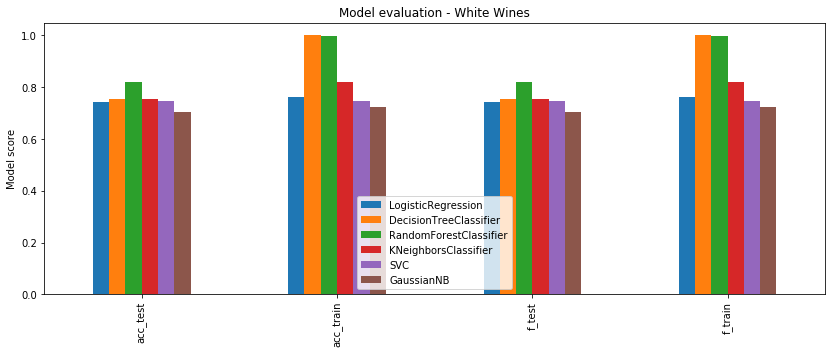

In [ ]:
#Visualize model results
model_df.plot(kind="bar", stacked=False, figsize=(14,5), title = "Accuracy and F1 Score comparison between models")
plt.title("Model evaluation - White Wines")
plt.ylabel("Model score")
plt.savefig("Images/WhiteWines/white_wine_model_eval.png")
plt.show()

#### In our example, our output is highly skewed towards average quality wines. So, accuracy is not a good indicator of performance. 
Therefore, we are plotting F1 score which is the harmonic average of precision and recall. 

Random Foreset Classifier has the best accuracy and F1 score among all the models we tested. 

### 6. HyperParameter tuning

Decision Trees and Random Forests are prone to overfitting. So it is important to optimize our model by tuning the model parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

rf_clf = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}
#StatifiedKFold takes group information into account to avoid building folds with imbalanced class 
#distributions (for binary or multiclass classification tasks).
cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(rf_clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Let's use these suggested parameters to prepare our model

In [ ]:
tuned_rf_clf = RandomForestClassifier(n_estimators=100,max_features=2,criterion='entropy',max_depth=None, random_state=1)
tuned_rf_clf=tuned_rf_clf.fit(X_train, y_train)
predictions_train = tuned_rf_clf.predict(X_train)
predictions_test = tuned_rf_clf.predict(X_test)
print(accuracy_score(y_train, predictions_train))
print(accuracy_score(y_test, predictions_test))
print(fbeta_score(y_train, predictions_train, beta=0.5, average='micro'))
print(fbeta_score(y_test, predictions_test, beta=0.5, average='micro'))

The scores for tuned model are slightly better than untuned model. So we will use the tuned model. Now we're done. 

### Let's save our model using pickel

In [ ]:
import pickle
# Below command saves our model to disk
pickle.dump(tuned_rf_clf, open('tuned_whitemodel.pkl','wb'))

In [ ]:
#Let's load our saved model
tuned_rfc = pickle.load(open('tuned_whitemodel.pkl','rb'))

In [ ]:
tuned_rfc

### Display classification report for our model

In [ ]:
# Display classification_report of the model
from sklearn.metrics import classification_report
print (classification_report (y_test, tuned_rfc.predict(X_test)))

# Prediction on new data

Now let's pass some random input values to our model and see how it does

In [ ]:
# Let's find some bad quality wines in our original dataset
whitewine_df_clean[whitewine_df_clean.quality < 4].head()

In [ ]:
#Create a new record similar to one of the high quality red wines
d = {'alcohol': 9.8, 'chlorides': 0.074, 'volatile_acidity': 0.26, 'total_sulfur_dioxide': 197, 'fixed_acidity': 8.5}

In [ ]:
# Convert data to array
request = [d['alcohol'],d['chlorides'],d['volatile_acidity'],d['total_sulfur_dioxide'],d['fixed_acidity']]
request = np.array([request])

In [ ]:
request

In [ ]:
#Model Prediction
y_pred = tuned_rfc.predict(request)
print(f"Model predicts the wine class to be {y_pred[0]}")

It predicted the quality accurately. Remember our three classes are 0(poor),1(average) and 2(great).